<strong><h2>Exploratory Data Analysis: Initial Findings from Data</h2></strong>

- Tricky to derive interesting sentiment data from large corpuses without <strong>VECTORIZING common word occurrences</strong>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as scp
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [4]:
TRAINING_TEXT_PATH = "./datasets/training/training_text"
df_text = pd.read_csv(TRAINING_TEXT_PATH, sep="\n")
df_text.head()

,"ID,Text"
0,0||Cyclin-dependent kinases (CDKs) regulate a ...
1,1|| Abstract Background Non-small cell lung c...
2,2|| Abstract Background Non-small cell lung c...
3,3||Recent evidence has demonstrated that acqui...
4,4||Oncogenic mutations in the monomeric Casita...


In [5]:
TRAINING_VARIANTS_PATH = "./datasets/training/training_variants"
df_variants = pd.read_csv(TRAINING_VARIANTS_PATH)
df_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [6]:
cleaned_text_data = list()
for item in df_text['ID,Text']:
    data = item.split("||")[1]
    cleaned_text_data.append(data)

In [7]:
df_text_clean = pd.DataFrame({"Clinical Evidence": cleaned_text_data})
df_text_clean.head()

,Clinical Evidence
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
df_clean = pd.concat([df_variants, df_text_clean], axis=1)
df_clean.head()

,ID,Gene,Variation,Class,Clinical Evidence
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [25]:
import string
printable = set(string.printable)
medical_record = "".join(filter(lambda X: X in printable, df_clean.iloc[150]["Clinical Evidence"]))

TEST_MODEL_FILE = "medical-record.txt"
with open(TEST_MODEL_FILE, "w+") as fw:
    fw.write(medical_record)
    fw.close()

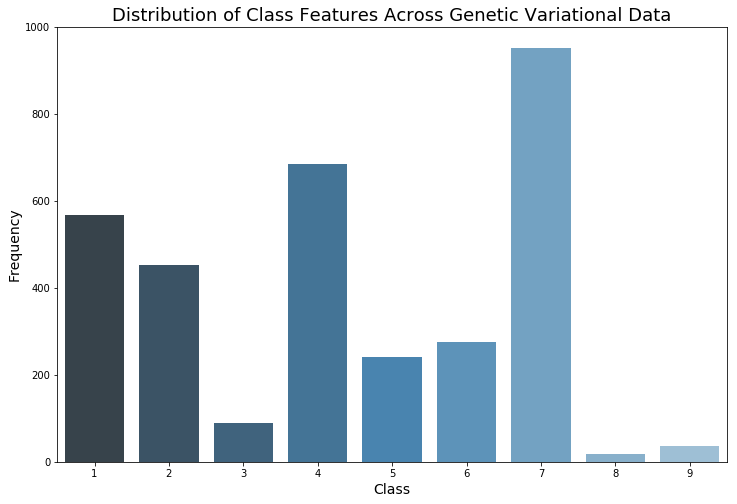

In [9]:
def _generate_feature_frequency_distribution(data, feature):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=feature, data=data, palette="Blues_d")
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel(feature, fontsize=14)
    plt.title("Distribution of {} Features Across Genetic Variational Data".format(feature), fontsize=18)
    
_generate_feature_frequency_distribution(df_variants, "Class")

In [10]:
def _assign_stopwords(stop_words):
    for word in stop_words:
        STOPWORDS.add(word)

stop_words = ["et", "al", "â", "Figure", "figure", "fig", "Supplementary", "We", "The", "Fig.", "In", "al.", "al.,", "(Fig."]
_assign_stopwords(stop_words)

In [11]:
df_text_and_classes = df_clean[df_clean.columns[-2:]].copy()
df_text_and_classes = df_text_and_classes.reindex(columns=["Clinical Evidence", "Class"])
df_text_and_classes.head()

,Clinical Evidence,Class
0,Cyclin-dependent kinases (CDKs) regulate a var...,1
1,Abstract Background Non-small cell lung canc...,2
2,Abstract Background Non-small cell lung canc...,2
3,Recent evidence has demonstrated that acquired...,3
4,Oncogenic mutations in the monomeric Casitas B...,4


In [14]:
# Why iteratively or manually create variable variables when you can just use a dictionary?
superstring_stores, superlists, supercounts = dict(), dict(), dict()

def _create_superstring_per_class(class_number):
    """ Helper function to generate super-string representing wordcloud data for each class number. """
    # Defines dataframe out of data instances where class column equals given functional parameter
    df_class = df_text_and_classes[df_text_and_classes["Class"] == class_number]
    
    # Generates list of class text data from dataframe and initializes wordcloud string object
    class_data = df_class["Clinical Evidence"].tolist()
    superstring = str()
    
    # Iteratively constructs superstring containing all text data for each valid matching class instance
    for iterator in range(len(class_data)):
        superstring += class_data[iterator]
    return superstring


# Constructs wordcloud dictionary object containing superstrings for each class instance
for iterator in range(1, 10):
    superstring_stores["Superstring Data (Class {})".format(iterator)] = _create_superstring_per_class(iterator)
    superlists["Superstring List {}".format(iterator)] = superstring_stores["Superstring Data (Class {})".format(iterator)].split()
    supercounts["Superstring Counts (Class {})".format(iterator)] = Counter(superlists["Superstring List {}".format(iterator)]).most_common(50)

In [15]:
# Create dataframes for all text data for each class
df_class1 = df_clean[df_clean["Class"] == 1]
df_class2 = df_clean[df_clean["Class"] == 2]
df_class3 = df_clean[df_clean["Class"] == 3]
df_class4 = df_clean[df_clean["Class"] == 4]
df_class5 = df_clean[df_clean["Class"] == 5]
df_class6 = df_clean[df_clean["Class"] == 6]
df_class7 = df_clean[df_clean["Class"] == 7]
df_class8 = df_clean[df_clean["Class"] == 8]
df_class9 = df_clean[df_clean["Class"] == 9]

In [16]:
# LONG RUNTIME
# Produce superstrings for each class
list_class1, superstring1 = df_class1["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class1)):
    superstring1 += list_class1[iterator]
    
list_class2, superstring2 = df_class2["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class2)):
    superstring2 += list_class2[iterator]

list_class3, superstring3 = df_class3["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class3)):
    superstring3 += list_class3[iterator]
    
list_class4, superstring4 = df_class4["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class4)):
    superstring4 += list_class4[iterator]
    
list_class5, superstring5 = df_class5["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class5)):
    superstring5 += list_class5[iterator]

list_class6, superstring6 = df_class6["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class6)):
    superstring6 += list_class6[iterator]

list_class7, superstring7 = df_class7["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class7)):
    superstring7 += list_class7[iterator]    

list_class8, superstring8 = df_class8["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class8)):
    superstring8 += list_class8[iterator]    

list_class9, superstring9 = df_class9["Clinical Evidence"].tolist(), str()
for iterator in range(len(list_class9)):
    superstring9 += list_class9[iterator]    

In [17]:
# SUPER LONG RUNTIME
# Produce wordclouds for each class
wordcloud1 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring1)
wordcloud2 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring2)
wordcloud3 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring3)
wordcloud4 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring4)
wordcloud5 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring5)
wordcloud6 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring6)
wordcloud7 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring7)
wordcloud8 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring8)
wordcloud9 = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=25).generate(superstring9)

CLASS 1


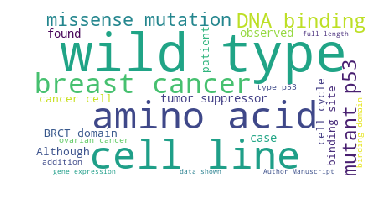

CLASS 2


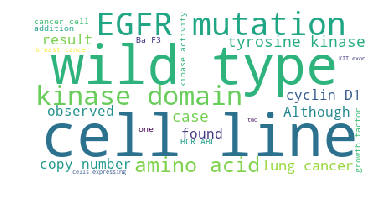

CLASS 3


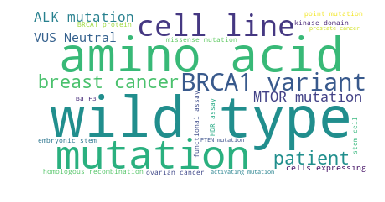

CLASS 4


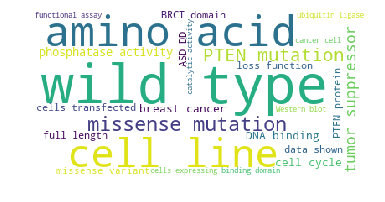

CLASS 5


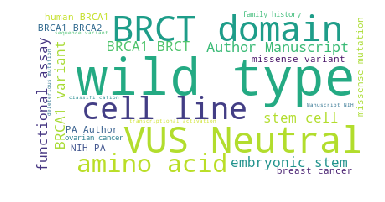

CLASS 6


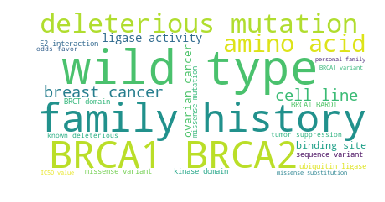

CLASS 7


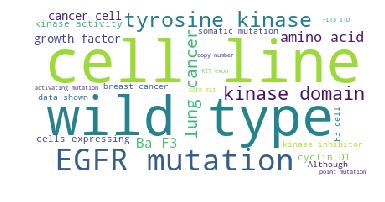

CLASS 8


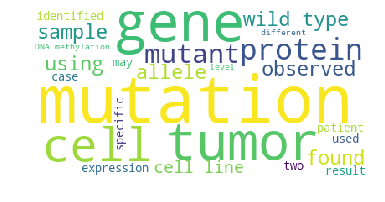

CLASS 9


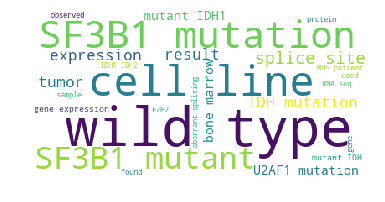

In [18]:
print("CLASS 1")
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

print("CLASS 2")
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

print("CLASS 3")
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

print("CLASS 4")
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

print("CLASS 5")
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

print("CLASS 6")
plt.imshow(wordcloud6)
plt.axis("off")
plt.show()

print("CLASS 7")
plt.imshow(wordcloud7)
plt.axis("off")
plt.show()

print("CLASS 8")
plt.imshow(wordcloud8)
plt.axis("off")
plt.show()

print("CLASS 9")
plt.imshow(wordcloud9)
plt.axis("off")
plt.show()

# TODO: Drop corpuses with lower occurrences in each text corpus? 

/Users/aakashsudhakar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


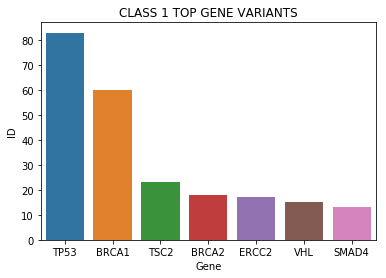

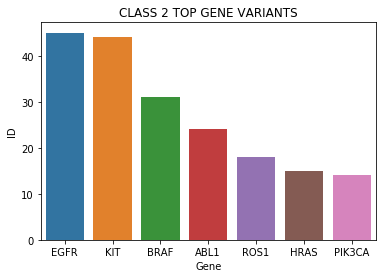

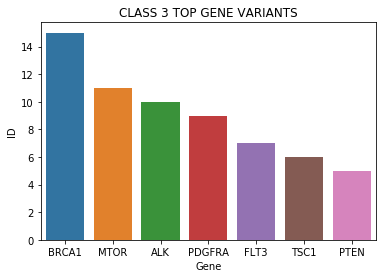

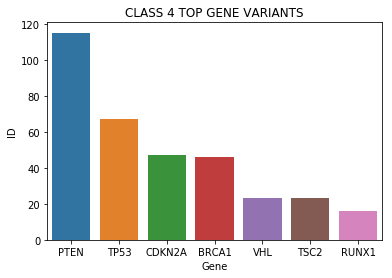

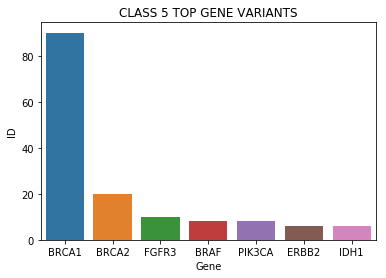

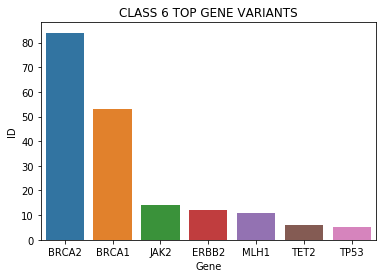

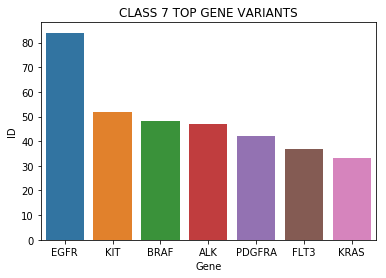

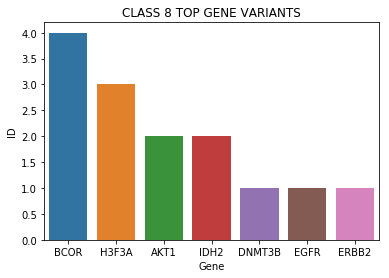

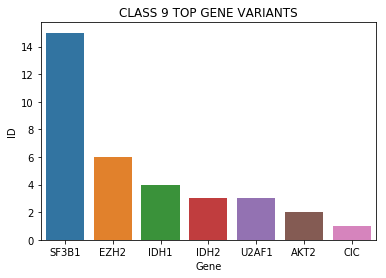

In [19]:
data = df_clean[df_clean["Class"] == 1].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 1 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 2].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 2 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 3].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 3 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 4].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 4 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 5].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 5 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 6].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 6 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 7].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 7 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 8].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 8 TOP GENE VARIANTS")
plt.show()

data = df_clean[df_clean["Class"] == 9].groupby("Gene")["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values("ID", ascending=False)[:7])
ax = plt.axes()
ax.set_title("CLASS 9 TOP GENE VARIANTS")
plt.show()

# TODO: Can I drop genes as principal components per class?

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

lda = LatentDirichletAllocation(n_components=9, max_iter=5, learning_method="online", learning_offset=50., random_state=0)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=50, stop_words=STOPWORDS)
tf = tf_vectorizer.fit_transform(df_clean["Clinical Evidence"])

tf_feature_names = tf_vectorizer.get_feature_names()
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=9, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [25]:
def _print_top_words(model, feature_names, num_top_words):
    for index, topic in enumerate(model.components_):
        print("Topic #{}: ".format(index))
        print(" ".join([feature_names[item] for item in topic.argsort()[:-num_top_words - 1:-1]]))
        print("\t")
        
_print_top_words(lda, tf_feature_names, 15)

Topic #0: 
variants functional binding wild assay table function activity associated supplementary dna clinical different three expression
	
Topic #1: 
expression tumor cancer gene pten tumors genes lines supplementary dna activity identified human levels growth
	
Topic #2: 
kit exon patients tumors mutant treatment tumor study table clinical 12 kinase wild resistance 20
	
Topic #3: 
p53 dna mutant binding wild mutants domain activity cancer proteins expression function gene residues genes
	
Topic #4: 
ras kinase resistance activation cancer activity phosphorylation lines growth mutant signaling tumor tumors treatment identified
	
Topic #5: 
egfr patients kinase exon 20 cancer treatment tumor tumors mutant growth wild table clinical study
	
Topic #6: 
brca1 cancer dna activity assay domain functional tumor function human variants associated expression table activation
	
Topic #7: 
patients clinical study table 12 treatment 20 identified gene dna associated studies different cancer thre

## TODO: 
- Benchmark time and memory effectiveness
- 